### Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Cleaned Data Loading

In [6]:
df1=pd.read_csv('Cleaned.csv')

1. __Data_1__

In [11]:
df1 = df1.sort_values(by='Year', ascending=True).set_index(['Date','Store'])

In [12]:
df1.head()

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-08-31 359            6   7917        728      0             0   
2013-02-13 468            3   4652        633      0             0   
           466            3   6649        690      0             0   
           464            3   8179       1130      0             0   
           463            3   5268        909      0             0   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-08-31 359                0          3           2               4370.0   
2013-02-13 468                0          2           2               5260.0   
           466                0          0           2               3110.0   
           464                0          2           0                520.0   
           463                0          0           0               4160.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  Promo2Running  \
Date       Store                                                              
2013-08-31 359         0  2013      8          35        243              0   
2013-02-13 468         0  2013      2           7         44              0   
           466         0  2013      2           7         44              0   
           464         0  2013      2           7         44              0   
           463         0  2013      2           7         44              0   

                  CompetitionOpen  Promo2Open  
Date       Store                               
2013-08-31 359                0.0         0.0  
2013-02-13 468                5.0         0.0  
           466              119.0         0.0  
           464               47.0         0.0  
           463                0.0         0.0

### Model Evaluation

In [13]:
# Split data into features (x) and target (y)
x = df1.drop('Sales', axis=1)
y = df1['Sales']

In [ ]:
# Define models for evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
}

In [ ]:
# Function to evaluate regression models
def evaluate_regressor(true, predicted):
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = mean_squared_error(true, predicted, squared=False)

    return r2, mae, mse, rmse

# Function to evaluate models
def evaluate_model(X, y, models):

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    # Apply StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model_list = []
    train_metrics_list = []
    test_metrics_list = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)


        train_r2, train_mae, train_mse, train_rmse = evaluate_regressor(y_train, y_train_pred)

   
        test_r2, test_mae, test_mse, test_rmse = evaluate_regressor(y_test, y_test_pred)

        model_list.append(model_name)

        train_metrics_list.append([train_r2, train_mae, train_mse, train_rmse])
        test_metrics_list.append([test_r2, test_mae, test_mse, test_rmse])

        print(model_name)

        print("Model Performance for Training data")
        print(f"R^2: {train_r2}")
        print(f"MAE: {train_mae}")
        print(f"MSE: {train_mse}")
        print(f"RMSE: {train_rmse}")
        print('-'*60)

        print("Model Performance for Test data")
        print(f"R^2: {test_r2}")
        print(f"MAE: {test_mae}")
        print(f"MSE: {test_mse}")
        print(f"RMSE: {test_rmse}")
        print('-'*60)

    # Create a report DataFrame
    train_columns = ['Train R^2', 'Train MAE', 'Train MSE', 'Train RMSE']
    test_columns = ['Test R^2', 'Test MAE', 'Test MSE', 'Test RMSE']
    report = pd.DataFrame(
        train_metrics_list, columns=train_columns, index=model_list
    ).join(
        pd.DataFrame(test_metrics_list, columns=test_columns, index=model_list)
    )

    return report

In [ ]:
# Evaluate the models
report = evaluate_model(x, y, models)
print(report)

Linear Regression
Model Performance for Training data
R^2: 0.7729565072299766
MAE: 814.7215428374797
MSE: 1108604.7588287257
RMSE: 1052.9030149205223
------------------------------------------------------------
Model Performance for Test data
R^2: 0.77251754048002
MAE: 818.4464406215359
MSE: 1112793.5784783694
RMSE: 1054.8903158520175
------------------------------------------------------------
Random Forest
Model Performance for Training data
R^2: 0.9951521780301041
MAE: 111.15444922834402
MSE: 23670.876624615332
RMSE: 153.85342578121336
------------------------------------------------------------
Model Performance for Test data
R^2: 0.9651576483762385
MAE: 299.0760366668016
MSE: 170441.0319275706
RMSE: 412.8450459041147
------------------------------------------------------------
XGBRegressor
Model Performance for Training data
R^2: 0.968220622917161
MAE: 297.5845493271246
MSE: 155171.89344128766
RMSE: 393.91863809838657
------------------------------------------------------------
Mo

### Conclusions
. __Random Forest is the best algorithm for the current model:-__
1. Random Forest has the __highest r^2 value__ which indicates a very high explanatory power and ability to capture the variance in the data for both training and test sets.
2. __Lowest MAE, MSE, and RMSE values__, indicating high accuracy and consistency in predictions.

### Hyperparameter Tuning

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
param_dist = {
    'n_estimators': [100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV with reduced iterations and folds
Random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=2, verbose=2, random_state=42, n_jobs=-1)
Random_search.fit(X_train_scaled, y_train)

# Best model
best_rf = Random_search.best_estimator_

Fitting 2 folds for each of 5 candidates, totalling 10 fits
RandomForestRegressor(random_state=42)


In [ ]:
print(Random_search.best_params_)
print(Random_search.best_estimator_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}
RandomForestRegressor(random_state=42)


In [17]:
# Define the parameters
params = {'n_estimators': 100, 
          'min_samples_split': 2, 
          'min_samples_leaf': 1, 
          'bootstrap': True}

# Initialize the RandomForestRegressor with the given parameters
best_rf = RandomForestRegressor(n_estimators=params['n_estimators'],
                           min_samples_split=params['min_samples_split'],
                           min_samples_leaf=params['min_samples_leaf'],
                           bootstrap=params['bootstrap'],
                           random_state=42)


best_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Predictions
y_train_pred = best_rf.predict(X_train_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print results
print("Random Forest Model Performance")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Random Forest Model Performance
Training R^2: 0.9951243870034829
Test R^2: 0.9645668698599152
Training MAE: 111.49420429666766
Test MAE: 301.98044232161976
Training MSE: 23808.12030223885
Test MSE: 173283.7884257164
Training RMSE: 154.29880201167748
Test RMSE: 416.27369413129674


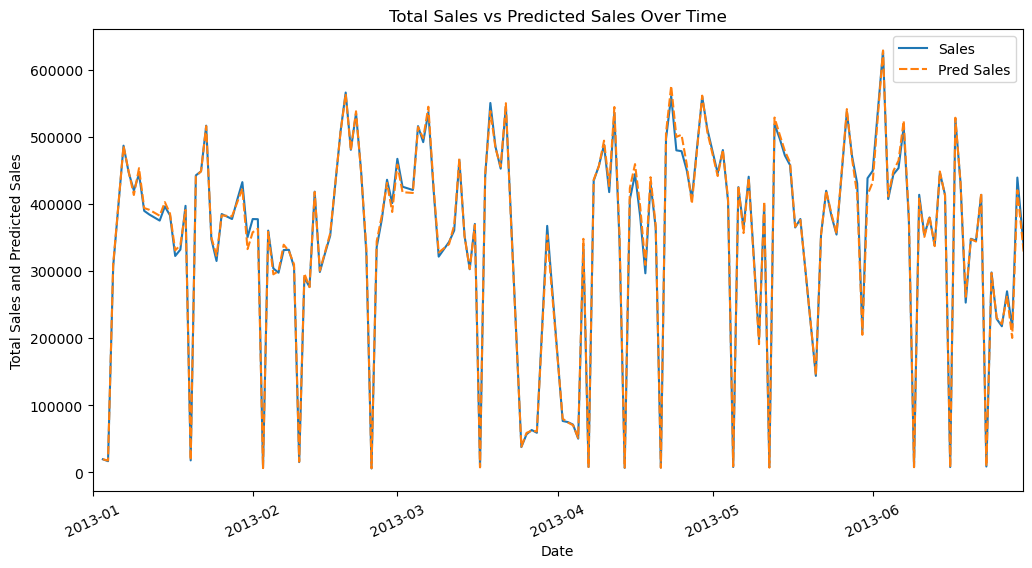

In [61]:
df_plot = pd.DataFrame({'Date': y_test.index.get_level_values('Date'),
                        'Sales': y_test.values,
                        'Pred Sales': y_test_pred})

plot = df_plot.groupby('Date')[['Sales', 'Pred Sales']].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(data=plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation=25)
plt.title("Total Sales vs Predicted Sales Over Time")

plt.xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2013-06-30'))  

plt.show()

In [20]:
with open('predictor.pkl', 'wb') as file:
    # Save the trained model using pickle
    pickle.dump(best_rf, file)
